#### 说明
本部分对fof和retire进行协整分析。 
1. **平稳性**。fof与retire都是非平稳的，取对数后仍然非平稳。但它们的增长率都是平稳序列（对数再差分）
2. **协整建模1**。 $fof$**~ **$retire$ 。结果残差是平稳的，说明2个I(1)的过程结果得到了I(0)的过程。协整向量为(1, -0.15)。同时建立ECM方程。
3. **协整建模2**。$log(fof)$**~ **$log(retire)$ 。结果残差是平稳的。同上。协整向量为(1, -1.9)。同时建立ECM方程。
4. **协整建模3**。使用*Lecture11* 中的$ca.jo()$函数建模。结果：
    1. 对fof与retire分析时不存在协整关系。
    2. 对log(fof)与log(retire)分析时也不存在协整关系。
    3. 对GR_fof与GR_retire分析时存在协整关系。但是这个是平稳序列。

In [2]:
getwd()
x=c("readxl","TSA","forecast", "FinTS","e1071","fGarch","MTS", "urca", "dynlm")
lapply(x, require, character.only = T)
rm(list=ls())

data2 <- read_excel("API.xlsx", sheet = "RR", col_types = c("skip", "skip", "skip", "skip", "numeric", "numeric", "skip"))
# 提取协整分析的数据，养老金和fof数量，从2007年开始
retire = ts(data2[1], frequency = 4,start = c(2007,1),names = 'retire')
fof = ts(data2[2], frequency = 4,start = c(2007,1),names = 'fof')

[1] "F:/git/R/0510"

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

In [44]:
FinTS.stats(retire)
FinTS.stats(fof)

Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
2007,40,10926.12,2355.952,0.1958747,-1.398626,6965,14878


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
2007,40,909.7876,366.4115,0.1585325,-1.574529,413.1352,1459.184


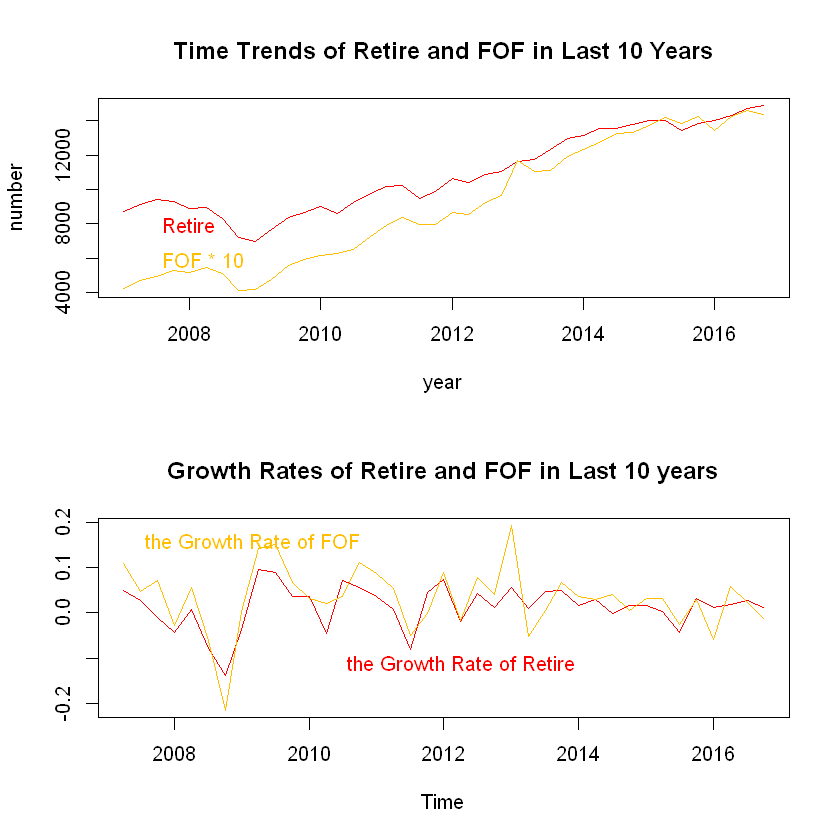

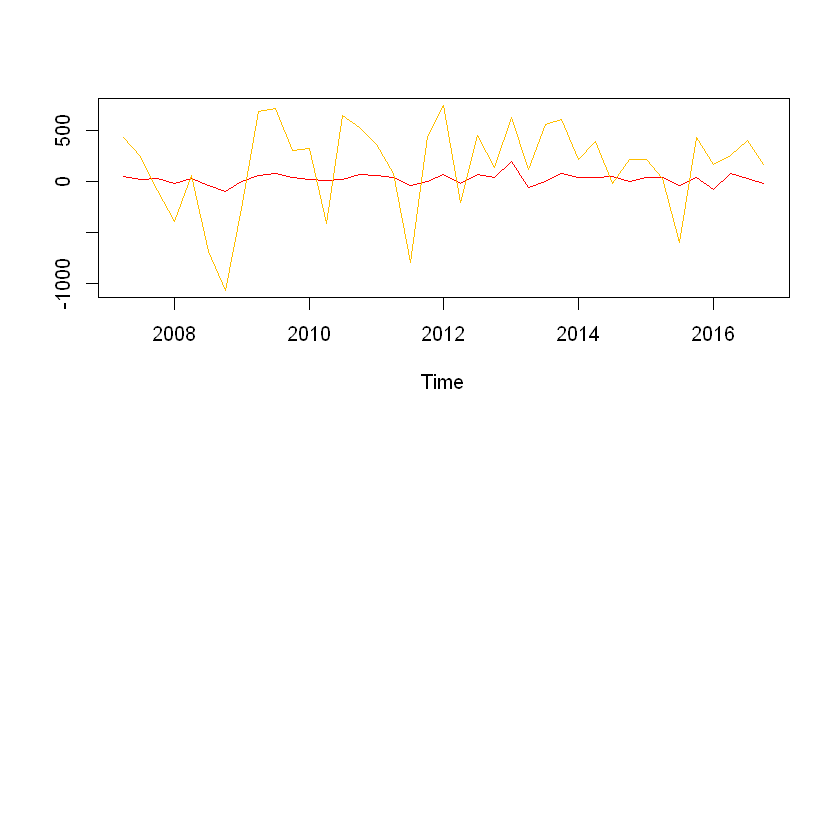

In [50]:
# 获得增长率
GR_retire = diff(log(retire))
GR_fof = diff(log(fof))
par(mfrow=c(2,1))
# 基数的协整关系比较复杂，不容易查看
ts.plot(retire, fof*10, col = rainbow(8), gpars = list(xlab="year", ylab="number" ))
title("Time Trends of Retire and FOF in Last 10 Years")
# legend(x=2007,y=9000, c("Retire","FOF*10"), text.col = rainbow(8), bty="n")
legend(x=2007, y= 9500, c("Retire"), text.col=rainbow(8)[1], bty="n")
legend(x=2007, y= 7500, c("FOF * 10"), text.col=rainbow(8)[2], bty="n")
# 增长率之间趋势相同，可以看出有协整关系
ts.plot(GR_retire, GR_fof, col=rainbow(8))
title("Growth Rates of Retire and FOF in Last 10 years")
legend(x=2010, y= -0.05, c("the Growth Rate of Retire"), text.col=rainbow(8)[1], bty="n")
legend(x=2007, y= 0.22, c("the Growth Rate of FOF"), text.col=rainbow(8)[2], bty="n")
# ts.plot(diff(fof), diff(retire),col=rainbow(8))


#### 单位根检验

进行单位根检验，分别使用*DF-test*、*KPSS-test*、*PP-test*来确保检验结果的稳健性。结果……一脸懵逼啊

In [6]:
# df-test/pp-test的原假设是非平稳， kpss-test的原假设是平稳
summary(ur.df(diff(retire),lags=3)) #拒绝
summary(ur.kpss(diff(retire))) #不拒绝
summary(ur.pp(diff(retire))) #小于临界值

#ADF检验，拒绝说明平稳，不拒绝说明不平稳
# adf.test(retire) #平稳
# adf.test(fof) #非平稳
# adf.test(GR_retire) #非平稳
# adf.test(GR_fof) #平稳


# adf.test(retire,alternative = 'explosive') # 不是爆炸性过程
# adf.test(fof,alternative = 'explosive') #不是爆炸性过程
# adf.test(GR_retire,alternative = 'explosive') #不是爆炸性过程
# adf.test(GR_fof,alternative = 'explosive') #不是爆炸性过程


# df-test/pp-test的原假设是非平稳， kpss-test的原假设是平稳
summary(ur.df(retire, lags = 3)) # 不拒绝
# adf.test(retire)
summary(ur.kpss(retire)) #拒绝
summary(ur.pp(retire)) # 不拒绝 （临界值附近）

summary(ur.df(log(retire),lags=3)) #不拒绝
summary(ur.kpss(log(retire))) #拒绝
summary(ur.pp(log(retire))) #不拒绝

summary(ur.df(GR_retire,lags=3)) #拒绝
summary(ur.kpss(GR_retire)) #不拒绝
summary(ur.pp(GR_retire)) #不拒绝


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-855.05  -41.91  163.29  469.74  770.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
z.lag.1     -0.64920    0.28057  -2.314   0.0275 *
z.diff.lag1 -0.05236    0.25661  -0.204   0.8397  
z.diff.lag2 -0.07284    0.21765  -0.335   0.7401  
z.diff.lag3 -0.04216    0.17733  -0.238   0.8136  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 477.6 on 31 degrees of freedom
Multiple R-squared:  0.3587,	Adjusted R-squared:  0.2759 
F-statistic: 4.334 on 4 and 31 DF,  p-value: 0.00671


Value of test-statistic is: -2.3138 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.1809 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1036.46  -146.86    38.13   352.54   635.49 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 117.0365    75.0543   1.559    0.128
y.l1          0.2149     0.1618   1.328    0.192

Residual standard error: 435 on 36 degrees of freedom
Multiple R-squared:  0.04672,	Adjusted R-squared:  0.02024 
F-statistic: 1.764 on 1 and 36 DF,  p-value: 0.1925


Value of test-statistic, type: Z-alpha  is: -28.6452 

         aux. Z statistics
Z-tau-mu             1.546


In [53]:
# df-test/pp-test的原假设是非平稳， kpss-test的原假设是平稳
# 拒绝说明平稳，不拒绝说明不平稳
summary(ur.df(fof)) #不拒绝
summary(ur.kpss(fof)) # 拒绝
summary(ur.pp(fof)) # 不拒绝

summary(ur.df(diff(fof))) #拒绝
summary(ur.kpss(diff(fof))) #不拒绝
summary(ur.pp(diff(fof))) #拒绝

summary(ur.df(log(fof),lags=3)) #不拒绝
summary(ur.kpss(log(fof))) #拒绝
summary(ur.pp(log(fof))) #不拒绝

summary(ur.df(GR_fof)) #拒绝
summary(ur.kpss(GR_fof)) #不拒绝
summary(ur.pp(GR_fof)) #拒绝


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-115.824  -25.939    8.554   30.464  182.785 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1     0.02646    0.01046   2.531   0.0159 *
z.diff.lag -0.09110    0.17204  -0.530   0.5997  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.28 on 36 degrees of freedom
Multiple R-squared:  0.1626,	Adjusted R-squared:  0.116 
F-statistic: 3.494 on 2 and 36 DF,  p-value: 0.04103


Value of test-statistic is: 2.5305 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.0743 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-127.92  -27.91   10.26   25.18  179.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.90547   23.30711   1.369    0.179    
y.l1         0.99354    0.02417  41.110   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 53.76 on 37 degrees of freedom
Multiple R-squared:  0.9786,	Adjusted R-squared:  0.978 
F-statistic:  1690 on 1 and 37 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -0.1639 

         aux. Z statistics
Z-tau-mu              1.44



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-101.21  -20.73   25.62   41.98  190.07 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.7513     0.2208  -3.403  0.00168 **
z.diff.lag  -0.1589     0.1662  -0.956  0.34566   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 59.99 on 35 degrees of freedom
Multiple R-squared:  0.4597,	Adjusted R-squared:  0.4289 
F-statistic: 14.89 on 2 and 35 DF,  p-value: 2.091e-05


Value of test-statistic is: -3.4031 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.1161 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-131.109  -34.671    9.996   26.495  180.409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  28.3908     9.8944   2.869  0.00684 **
y.l1         -0.1052     0.1670  -0.630  0.53280   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54.12 on 36 degrees of freedom
Multiple R-squared:  0.0109,	Adjusted R-squared:  -0.01658 
F-statistic: 0.3966 on 1 and 36 DF,  p-value: 0.5328


Value of test-statistic, type: Z-alpha  is: -40.0703 

         aux. Z statistics
Z-tau-mu            2.8849



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.235654 -0.029210  0.009452  0.041083  0.160717 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.004970   0.002183   2.277   0.0296 *
z.diff.lag1  0.138442   0.173385   0.798   0.4305  
z.diff.lag2 -0.137916   0.173951  -0.793   0.4337  
z.diff.lag3 -0.192555   0.170644  -1.128   0.2675  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07144 on 32 degrees of freedom
Multiple R-squared:  0.2051,	Adjusted R-squared:  0.1057 
F-statistic: 2.064 on 4 and 32 DF,  p-value: 0.1088


Value of test-statistic is: 2.2765 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.0743 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25946 -0.03200  0.01179  0.03291  0.16546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20848    0.17977    1.16    0.254    
y.l1         0.97364    0.02673   36.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07 on 37 degrees of freedom
Multiple R-squared:  0.9729,	Adjusted R-squared:  0.9721 
F-statistic:  1327 on 1 and 37 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -1.0362 

         aux. Z statistics
Z-tau-mu            1.1587



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19661 -0.00530  0.02530  0.06323  0.18321 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.74202    0.19820  -3.744  0.00065 ***
z.diff.lag  0.02615    0.16466   0.159  0.87471    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07448 on 35 degrees of freedom
Multiple R-squared:  0.3649,	Adjusted R-squared:  0.3286 
F-statistic: 10.05 on 2 and 35 DF,  p-value: 0.000355


Value of test-statistic is: -3.7439 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0954 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.230951 -0.023625  0.005496  0.038821  0.162127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.02459    0.01252   1.964   0.0573 .
y.l1         0.14885    0.16290   0.914   0.3669  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06988 on 36 degrees of freedom
Multiple R-squared:  0.02267,	Adjusted R-squared:  -0.004481 
F-statistic: 0.8349 on 1 and 36 DF,  p-value: 0.3669


Value of test-statistic, type: Z-alpha  is: -28.5833 

         aux. Z statistics
Z-tau-mu            1.9269


#### 协整1

 m1:   $fof$ **~** $retire$


Call:
lm(formula = fof ~ retire)

Residuals:
     Min       1Q   Median       3Q      Max 
-182.482  -26.622    1.348   38.330  145.811 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.552e+02  5.632e+01  -13.41 5.51e-16 ***
retire       1.524e-01  5.042e-03   30.22  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 74.18 on 38 degrees of freedom
Multiple R-squared:  0.9601,	Adjusted R-squared:  0.959 
F-statistic: 913.5 on 1 and 38 DF,  p-value: < 2.2e-16



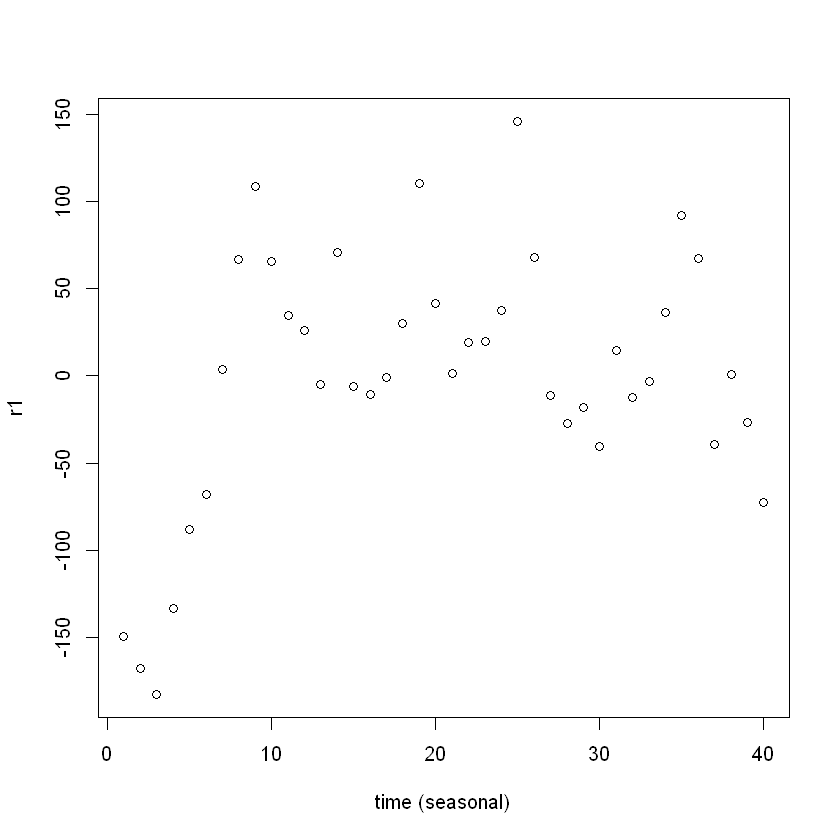

In [16]:
# 模型m1, 得到残差序列 r1
# m1 = fof ~ retire
m1 = lm(fof~retire)
# r1 = m1$residuals
r1 <- m1$residuals
par(mfrow=c(1,1))
plot(r1, xlab = 'time (seasonal)')
# t = adf.test(resid, alternative = 'explosive')
print(summary(m1))
# print(t)

In [17]:
# 对残差序列进行 单位根检验
summary(ur.df(r1)) #拒绝
summary(ur.kpss(r1)) #不拒绝
summary(ur.pp(r1)) #不拒绝

# r1 可以认为是平稳的，说明二者之间存在协整关系。
# 系数为 0.1524，则协整向量为 (1, -0.15)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.277 -27.154   0.878  35.364 119.339 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.3536     0.1112   -3.18  0.00303 **
z.diff.lag   0.1376     0.1547    0.89  0.37948   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45.54 on 36 degrees of freedom
Multiple R-squared:  0.2193,	Adjusted R-squared:  0.1759 
F-statistic: 5.056 on 2 and 36 DF,  p-value: 0.01161


Value of test-statistic is: -3.1799 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.2674 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.241 -29.743  -1.644  27.651 116.425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.488      7.450   0.334     0.74    
y.l1           0.722      0.103   7.006 2.78e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.51 on 37 degrees of freedom
Multiple R-squared:  0.5702,	Adjusted R-squared:  0.5586 
F-statistic: 49.09 on 1 and 37 DF,  p-value: 2.78e-08


Value of test-statistic, type: Z-alpha  is: -10.0379 

         aux. Z statistics
Z-tau-mu            0.3398


In [18]:
# bind the data
d1 = diff(fof); d2 = diff(retire)
r1 <- r1[1:39]
ecmdat1 <- cbind(d1,d2, r1)

# 建立ECM模型
ecm1 <- dynlm(d1~ L(r1, 1)+ L(d1, 1)  + L(d2, 1) + L(d2,0), data = ecmdat1)
summary(ecm1)

# 对残差序列进行 单位根检验
r_ecm1 <- ecm1$residuals
summary(ur.df(r_ecm1)) #拒绝
summary(ur.kpss(r_ecm1)) #不拒绝
summary(ur.pp(r_ecm1)) #小于临界值


Time series regression with "ts" data:
Start = 2007(3), End = 2016(4)

Call:
dynlm(formula = d1 ~ L(r1, 1) + L(d1, 1) + L(d2, 1) + L(d2, 0), 
    data = ecmdat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.912 -16.156   2.919  18.399 145.465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.96621    7.49961   2.129   0.0408 *  
L(r1, 1)    -0.19262    0.10476  -1.839   0.0750 .  
L(d1, 1)    -0.36056    0.17486  -2.062   0.0472 *  
L(d2, 1)     0.04243    0.02176   1.950   0.0598 .  
L(d2, 0)     0.08738    0.01679   5.205 1.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 38.94 on 33 degrees of freedom
Multiple R-squared:  0.5306,	Adjusted R-squared:  0.4737 
F-statistic: 9.326 on 4 and 33 DF,  p-value: 3.712e-05



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.998 -16.444   3.357  17.573 149.965 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -1.2364     0.2529  -4.889 2.39e-05 ***
z.diff.lag   0.1597     0.1713   0.932    0.358    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.04 on 34 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.501 
F-statistic: 19.07 on 2 and 34 DF,  p-value: 2.792e-06


Value of test-statistic is: -4.8887 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.1403 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.784 -16.026   1.094  16.323 145.357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.28982    6.08410   0.212    0.833
y.l1        -0.05841    0.17073  -0.342    0.734

Residual standard error: 36.98 on 35 degrees of freedom
Multiple R-squared:  0.003333,	Adjusted R-squared:  -0.02514 
F-statistic: 0.1171 on 1 and 35 DF,  p-value: 0.7343


Value of test-statistic, type: Z-alpha  is: -35.038 

         aux. Z statistics
Z-tau-mu            0.2149


#### 协整2

m2: $log(fof)$**~**$log(retire)$


Call:
lm(formula = log(fof) ~ log(retire))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29386 -0.02488  0.01774  0.06694  0.18403 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.93630    0.76678  -14.26   <2e-16 ***
log(retire)   1.90423    0.08264   23.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1122 on 38 degrees of freedom
Multiple R-squared:  0.9332,	Adjusted R-squared:  0.9315 
F-statistic: 530.9 on 1 and 38 DF,  p-value: < 2.2e-16



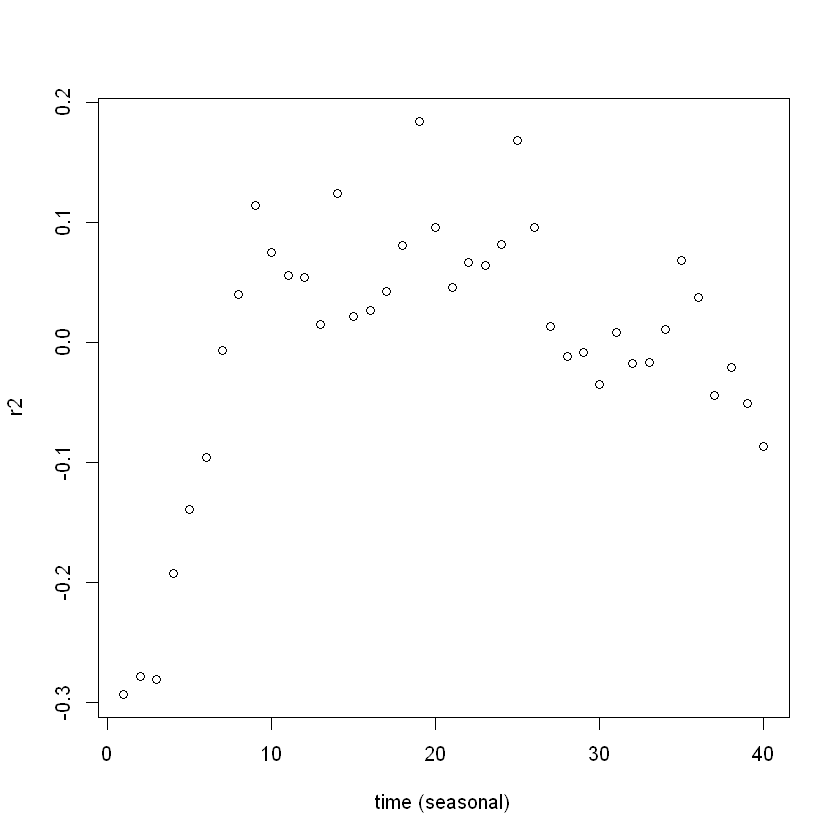

In [19]:
# 模型m2, 得到残差序列 r2
# m2 = log(fof)~ log(retire)
m2 = lm(log(fof)~log(retire))
r2 <- m2$residuals
par(mfrow=c(1,1))
plot(r2, xlab = 'time (seasonal)')
# t = adf.test(resid, alternative = 'explosive')
print(summary(m2))

In [20]:
# 对残差序列进行 单位根检验
summary(ur.df(r2)) #拒绝
summary(ur.kpss(r2)) #不拒绝
summary(ur.pp(r2)) #拒绝

# r2 可以认为是平稳的，说明二者之间存在协整关系。
# 系数为 1.90423 ，则协整向量为 (1, -1.9)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076909 -0.026001  0.005282  0.033501  0.121643 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.24276    0.08221  -2.953  0.00551 **
z.diff.lag  0.03700    0.15062   0.246  0.80736   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05085 on 36 degrees of freedom
Multiple R-squared:  0.195,	Adjusted R-squared:  0.1503 
F-statistic:  4.36 on 2 and 36 DF,  p-value: 0.02015


Value of test-statistic is: -2.9529 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.3091 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08296 -0.03477  0.00343  0.02463  0.11447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.005773   0.008093   0.713     0.48    
y.l1        0.792254   0.073635  10.759 6.01e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05053 on 37 degrees of freedom
Multiple R-squared:  0.7578,	Adjusted R-squared:  0.7512 
F-statistic: 115.8 on 1 and 37 DF,  p-value: 6.014e-13


Value of test-statistic, type: Z-alpha  is: -7.611 

         aux. Z statistics
Z-tau-mu             0.741


In [21]:
# bind the data
r2 <- r2[1:39]
ecmdat2 <- cbind(GR_fof,GR_retire, r2)

In [22]:
# 建立ECM模型
ecm2 <- dynlm(GR_fof~ L(r2, 1)+ L(GR_fof, 1)  + L(GR_retire, 1) + L(GR_retire,0), data = ecmdat2)
summary(ecm2)

# 对残差序列进行 单位根检验
r_ecm2 <- ecm2$residuals
summary(ur.df(r_ecm2)) #拒绝
summary(ur.kpss(r_ecm2)) #不拒绝
summary(ur.pp(r_ecm2)) #小于临界值


Time series regression with "ts" data:
Start = 2007(3), End = 2016(4)

Call:
dynlm(formula = GR_fof ~ L(r2, 1) + L(GR_fof, 1) + L(GR_retire, 
    1) + L(GR_retire, 0), data = ecmdat2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088834 -0.023098 -0.001931  0.023389  0.122996 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.016125   0.007709   2.092   0.0442 *  
L(r2, 1)        -0.133207   0.072946  -1.826   0.0769 .  
L(GR_fof, 1)    -0.277166   0.174325  -1.590   0.1214    
L(GR_retire, 1)  0.543331   0.263426   2.063   0.0471 *  
L(GR_retire, 0)  1.199106   0.161462   7.427 1.56e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04163 on 33 degrees of freedom
Multiple R-squared:  0.6821,	Adjusted R-squared:  0.6435 
F-statistic:  17.7 on 4 and 33 DF,  p-value: 7.532e-08



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087779 -0.023693 -0.001953  0.023203  0.124330 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.05327    0.25083  -4.199 0.000182 ***
z.diff.lag  0.06222    0.17386   0.358 0.722653    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04018 on 34 degrees of freedom
Multiple R-squared:  0.4859,	Adjusted R-squared:  0.4557 
F-statistic: 16.07 on 2 and 34 DF,  p-value: 1.223e-05


Value of test-statistic is: -4.1991 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.4097 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08988 -0.02382  0.00013  0.02284  0.12216 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.000986   0.006572   0.150    0.882
y.l1        -0.008681   0.171793  -0.051    0.960

Residual standard error: 0.03995 on 35 degrees of freedom
Multiple R-squared:  7.295e-05,	Adjusted R-squared:  -0.0285 
F-statistic: 0.002553 on 1 and 35 DF,  p-value: 0.96


Value of test-statistic, type: Z-alpha  is: -36.426 

         aux. Z statistics
Z-tau-mu              0.15


#### 协整3

In [23]:
d1 = GR_fof
d2 = GR_retire
d = data.frame(d1,d2)
m3 = ca.jo(d, type="eigen", ecdet="none", K=2,season = 4, spec="transitory")
summary(m3)
# 协整向量
m3@V


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.3922693 0.3405903

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 15.41  6.50  8.18 11.65
r = 0  | 18.43 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              fof.l1 retire.l1
fof.l1     1.0000000  1.000000
retire.l1 -0.8210015 -2.489989

Weights W:
(This is the loading matrix)

             fof.l1 retire.l1
fof.d    -1.6478304 0.2120447
retire.d -0.6892145 0.4689056


,fof.l1,retire.l1
fof.l1,1.0000000,1.000000
retire.l1,-0.8210015,-2.489989


In [24]:
d1 = log(fof)
d2 = log(retire)
d = data.frame(d1,d2)
m3 = ca.jo(d, type="eigen", ecdet="none", K=2,season = 4, spec="transitory")
summary(m3)
# 协整向量
m3@V


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.25620098 0.08283457

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  3.29  6.50  8.18 11.65
r = 0  | 11.25 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             fof.l1 retire.l1
fof.l1     1.000000  1.000000
retire.l1 -1.678747 -3.021223

Weights W:
(This is the loading matrix)

             fof.l1  retire.l1
fof.d    -0.0107555 0.07325991
retire.d  0.1267081 0.04159619


,fof.l1,retire.l1
fof.l1,1.000000,1.000000
retire.l1,-1.678747,-3.021223
